# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Thomas Nghiem
- Treeden Bautista
- Vinod Vairavaraj
- Royan Bhupatiraju

# Abstract

Malaria remains a global health challenge, with its spread influenced by a combination of environmental and socioeconomic factors. Understanding how these factors play into the spread of this infectious disease is relevant in better predicting risky conditions. As such, our research seeks to explore the relationship between the number of malaria cases and deaths with factors such as average yearly temperature, agriculture, health, and education. Through a cross-sectional analysis of various datasets across different regions and times, we explored the trends and their overall impact.

To conduct our analysis, the first step was data aggregation, in order to better analyze the findings. Visualization such as histograms and scatterplots were useful in seeing the distribution of data and finding general trends. Through these visualizations, we removed extreme outliers and ran statistical tests that gave insight into the statistical significance of these factors. These tests gave insight into which factors were relevant in predicting the number of malaria cases and deaths.

Overall, among the various various environmental and socioeconomic factors explored, our findings suggest that average yearly temperature and agriculture are statisically significant factors with a positive correlation to number of malaria cases and deaths, while the rest showed no clear statistical relationship. So, regions with rising temperatures and higher agriculture expenditure faced increased malaria cases, which is in line with our hypothesis as these directly affect mosquito populations as well as exposure rates to mosquitos. So, this research illustrates the need for integrated strategies that consider these conditions in regions at higher risk.

# Research Question

How do climate factors (temperature, humidity, and rainfall) influence the exponential spread of malaria across different regions, and can we use machine learning models to predict future outbreaks? In addition, are there socioeconomic factors (average income, education, occupation) that impact the spread of malaria among different regions?

## Background and Prior Work

Malaria is an infectious disease transmitted by mosquitoes that carry parasites. <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) It remains a major public health challenge, particularly in tropical and subtropical regions, with millions of cases worldwide. <a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) The transmission of malaria is influenced by multiple environmental factors, including temperature, humidity, and rainfall, all of which affect the mosquito life cycle. The disease’s increased spread in certain conditions makes it a valuable topic for modeling and predictive analysis. Understanding how climate factors influence malaria transmission can help improve early warning systems for this issue.

Previous studies have explored the relationship between climate variables and malaria transmission. Parham and Michael developed a model that described malaria spread under different temperature and humidity conditions, demonstrating that specific temperature ranges can lead to both increase and decrease malaria transmission.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) We also found inspiration through Reshetnikov’s work, who developed a predictive algorithm regarding the spread of COVID, where they also researched various factors that could influence transmission.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2)
Our project aims to build upon this prior work by analyzing the spread of malaria in different climate conditions and building machine-learning models to predict future outbreaks. 


1. <a name="cite_note-1"></a> [^](#cite_ref-1) Reshetnikov, A. (2023) Predictive algorithm for the regional spread of coronavirus infection across the Russian Federation. *BMC Medical Informatics and Decision Making*. https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-023-02135-1 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Parham, P. (2009) Modeling the Effects of Weather and Climate Change on Malaria Transmission. *Environmental Health Perspectives*. https://pmc.ncbi.nlm.nih.gov/articles/PMC2866676/
3. <a name="cite_note-3"></a> [^](#cite_ref-3) WHO. (2024, December 11). Malaria. World Health Organization; WHO. https://www.who.int/news-room/fact-sheets/detail/malaria
4. <a name="cite_note-4"></a> [^](#cite_ref-4) CDC. (2024, April 1). Malaria’s Impact Worldwide. Malaria. https://www.cdc.gov/malaria/php/impact/index.html

# Hypothesis


We believe that there is a strong correlation of growth in malaria within areas that have high humidity and temperatures as these are ideal conditions for the reproduction of mosquitoes. With this increase in mosquito populations, we believe the spread of malaria will also increase exponentially. In addition, we believe socioeconomic factors can significantly impact the spread of malaria across different regions; with lower-income areas, lower education levels, and occupations that involve outdoor exposure being associated with higher malaria transmission rates.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: reported_numbers.csv
  - Link to the dataset: https://www.kaggle.com/datasets/imdevskp/malaria-dataset/data
  - Number of observations: 1945
  - Number of variables: 5
- Dataset #2
  - Dataset Name: city_temp
  - Link to the dataset: https://www.kaggle.com/code/seoshmeo/avg-temperature-in-africa-by-years/input
  - Number of observations: 1048576
  - Number of variables: 8
- Dataset #3 
  - Dataset Name: soci_econ_country_profiles.csv
  - Link to the dataset: https://www.kaggle.com/datasets/nishanthsalian/socioeconomic-country-profiles/data?select=soci_econ_country_profiles.csv
  - Number of observations: 67
  - Number of variables: 95


Dataset #1 focuses on the number of confirmed cases and deaths in various countries from 2000 to 2017. These are the important variables necessary for our project. They will be important representations of the change in malaria over time, which will be tied to environmental and socioeconomic factors. To process the data, NANs and countries with less data will need to be addressed. 

For Dataset #2, the dataset is focused on the average temperature broken down by day, month, and year in various cities and countries worldwide. The important variables for our project are the average temperature and the yearly breakdown. These will be important as representations of the country's environment which will be tied into the malaria spread. To process the data, NANs will be addressed, temperature standardized, and determine how to consolidate the extensive breakdown of the days.  

For Dataset #3, the dataset is focused on key socioeconomic factors as of 2017. The important variables for this will be Economy Agriculture %, Health %, Education %, Health Care Index, and Climate Index. It will be important to identify if there are socioeconomic factors that correlate with Malaria spread. To process this data, standardizing data and dropping NANs and outliers will be necessary. In addition, ensuring that unneeded columns are dropped will be necessary due to the great amount of data.

Merging of the datasets will be needed to represent and answer the research question. Merging #1 and #2 will allow us to answer the first question on climate impact on malaria by focusing on malaria statistics, country, time spread, and temperature. Adding in #3 will allow us to correlate malaria statistics against various socioeconomic factors which will help us solve the other part of the research question. Overall, merging the datasets and removing extraneous data will allow us to successfully combine the different datasets.

## Dataset reported_numbers.csv

In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install patsy
%pip install statsmodels



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest



dfReportNumbers = pd.read_csv('reported_numbers.csv')
dfReportNumbers.rename(columns={'WHO Region':'Region'}, inplace=True)

print(dfReportNumbers.head())
print(dfReportNumbers.isna().sum().sum())

dfReportNumbers.fillna(0, inplace=True)
print(dfReportNumbers.head())
print(dfReportNumbers.isna().sum().sum())

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

NaNs are replaced with 0's as they are being assumed to be 0 confirmed deaths. All columns are to be used in the final analysis, with the number of cases vs. deaths to help talk about the fatality rate and the WHO region is to look at countries as groups.

## Dataset city_temp

In [4]:
dfCityTemp = pd.read_csv('city_temp.csv')
print(dfCityTemp.head())

dfCityTemp['AvgTemperature'] = dfCityTemp['AvgTemperature'].replace(-99, np.nan) #-99 is used as a NaN value
dfCityTemp = dfCityTemp.dropna(subset=['AvgTemperature'])
print(dfCityTemp.isna().sum().sum()) #There are now no NaNs

dfCityTemp['MonthlyAvgTemp'] = dfCityTemp.groupby(['Country', 'Year', 'Month'])['AvgTemperature'].transform('mean') #Calculate avg temp per month
dfCityTemp['YearlyAvgTemp'] = dfCityTemp.groupby(['Country', 'Year'])['AvgTemperature'].transform('mean') #Calculate avg temp per year

dfCityTemp.rename(columns={'AvgTemperature': 'DailyAvgTemp'}, inplace=True) #Now with MonthlyAvgTemp and YearlyAvgTemp, renaming to break down appropiately

print(dfCityTemp)

   Region  Country  Month  Day  Year  AvgTemperature
0  Africa  Algeria      1    1  1995            64.2
1  Africa  Algeria      1    2  1995            49.4
2  Africa  Algeria      1    3  1995            48.8
3  Africa  Algeria      1    4  1995            46.4
4  Africa  Algeria      1    5  1995            47.9
0
              Region  Country  Month  Day  Year  DailyAvgTemp  MonthlyAvgTemp  \
0             Africa  Algeria      1    1  1995          64.2       51.419355   
1             Africa  Algeria      1    2  1995          49.4       51.419355   
2             Africa  Algeria      1    3  1995          48.8       51.419355   
3             Africa  Algeria      1    4  1995          46.4       51.419355   
4             Africa  Algeria      1    5  1995          47.9       51.419355   
...              ...      ...    ...  ...   ...           ...             ...   
1047071  Middle East  Lebanon      5   13  2020          67.8       68.576923   
1047180  Middle East     Oman   

NaNs are represented as -99 and are drops as there is no reasonable way to assign them a corresponding value. As a result, there are missing days and months for some of the countries. All entries containing -99 are dropped. 

## Dataset soci_econ_country_profiles.csv

In [5]:
dfSociEcon = pd.read_csv('soci_econ_country_profiles.csv')
dfSociEcon = dfSociEcon[['country', 'Region', 'Economy: Agriculture (% of GVA)', 'Health: Total expenditure (% of GDP)', 'Education: Government expenditure (% of GDP)', 'Health Care Index', 'Climate index']]
dfSociEcon.rename(columns={'country':'Country'}, inplace=True) #Renaming for consistency
dfSociEcon = dfSociEcon.replace("...", 0)
dfSociEcon['Education: Government expenditure (% of GDP)'] = dfSociEcon['Education: Government expenditure (% of GDP)'].replace('-99', 0)
dfSociEcon = dfSociEcon.replace("~0.0", 0)


#Intially filtered out the columns due to the great number of columns
print(dfSociEcon)
print(dfSociEcon.isna().sum().sum()) #There are  no NaNs

                               Country             Region  \
0                            Argentina       SouthAmerica   
1                            Australia            Oceania   
2                              Austria      WesternEurope   
3                              Belarus      EasternEurope   
4                              Belgium      WesternEurope   
..                                 ...                ...   
61                United Arab Emirates        WesternAsia   
62                      United Kingdom     NorthernEurope   
63            United States of America    NorthernAmerica   
64  Venezuela (Bolivarian Republic of)       SouthAmerica   
65                             Vietnam  South-easternAsia   

   Economy: Agriculture (% of GVA)  Health: Total expenditure (% of GDP)  \
0                              6.0                                   4.8   
1                              2.5                                   9.4   
2                              1.3     

NaNs were present, however, were in other columns that were dropped. All the columns will be used in the final analysis, with them being used against the temperature and malaria spread data to conclude.

# Results

## Exploratory Data Analysis


### Dataset Merging

The datasets will be used to create three usable DataFrames for visualization and analysis. The reported case and temperature will represent the initial question. The reported case and socioeconomic factors will address the second. Finally, for the third, all datasets will be used to identify any confounding variables or influence between variables. 

In [6]:
#Prep for merging
mergeDfCityTemp = dfCityTemp.drop(columns=['Month', 'Day', 'DailyAvgTemp', 'MonthlyAvgTemp', 'Region']).drop_duplicates().reset_index(drop=True) #Dropping columns
dfSociEcon['Year'] = 2017 #Dataset is mentioned to only be 2017
mergeDfSociEcon = dfSociEcon.drop(columns='Region').drop_duplicates().reset_index(drop=True) #Not needed here

numVtempDf = pd.merge(dfReportNumbers, mergeDfCityTemp, how='inner', on=["Country", "Year"])
#Will be used for anlaysis of temperatue against cases/deaths

numVsociDf = pd.merge(dfReportNumbers, mergeDfSociEcon, how='inner', on=["Country", "Year"])
#Will be used for analysis of socieconomic factors against cases/deaths
#Converting object types into numerics
print(numVsociDf.dtypes)
numVsociDf["Economy: Agriculture (% of GVA)"] = pd.to_numeric(numVsociDf["Economy: Agriculture (% of GVA)"], errors='coerce') #Converting from Object
numVsociDf["Education: Government expenditure (% of GDP)"] = pd.to_numeric(numVsociDf["Education: Government expenditure (% of GDP)"], errors='coerce') #Converting from Object
print(numVsociDf.dtypes)

numVtempVsociDf = pd.merge(numVtempDf, mergeDfSociEcon, how='inner', on=["Country", "Year"])
#Will be used to consider all of these factors in conjunction


numVtempVsociDf = numVtempVsociDf[numVtempVsociDf["Year"] == 2017]
#Limited to only 2017 as all the socieconomic factors where only for 2017.

Country                                          object
Year                                              int64
No. of cases                                    float64
No. of deaths                                   float64
Region                                           object
Economy: Agriculture (% of GVA)                  object
Health: Total expenditure (% of GDP)            float64
Education: Government expenditure (% of GDP)     object
Health Care Index                               float64
Climate index                                   float64
dtype: object
Country                                          object
Year                                              int64
No. of cases                                    float64
No. of deaths                                   float64
Region                                           object
Economy: Agriculture (% of GVA)                 float64
Health: Total expenditure (% of GDP)            float64
Education: Government expenditure 

### Climate and Spread

In [7]:
print("No. of Cases Statistics:\n", numVtempDf['No. of cases'].describe())
print("No. of Cases Statistics:\n", numVtempDf['No. of cases'].median())
print("------------------------")
print("No. of Deaths Statistics:\n", numVtempDf['No. of deaths'].describe())
print("No. of Deaths Statistics:\n", numVtempDf['No. of deaths'].median())

No. of Cases Statistics:
 count    6.700000e+02
mean     3.658048e+05
std      1.216887e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.163000e+03
75%      1.542878e+05
max      1.166783e+07
Name: No. of cases, dtype: float64
No. of Cases Statistics:
 8163.0
------------------------
No. of Deaths Statistics:
 count      670.000000
mean      1311.650746
std       4886.430892
min          0.000000
25%          0.000000
50%         93.500000
75%        734.500000
max      51842.000000
Name: No. of deaths, dtype: float64
No. of Deaths Statistics:
 93.5


For case, there is a wide distribution of values with the max being 1.166783e+07 and the mean being 3.658048e+05. The median is at 8.163000e+03 however, which gives the impression that the data is skewed. For deaths, the mean is 1311.650746, the median is 93.500000, and the max is 51842.000000. This also means that the data set is skewed as there is a vast difference between the mean and median. 

#### Histograms

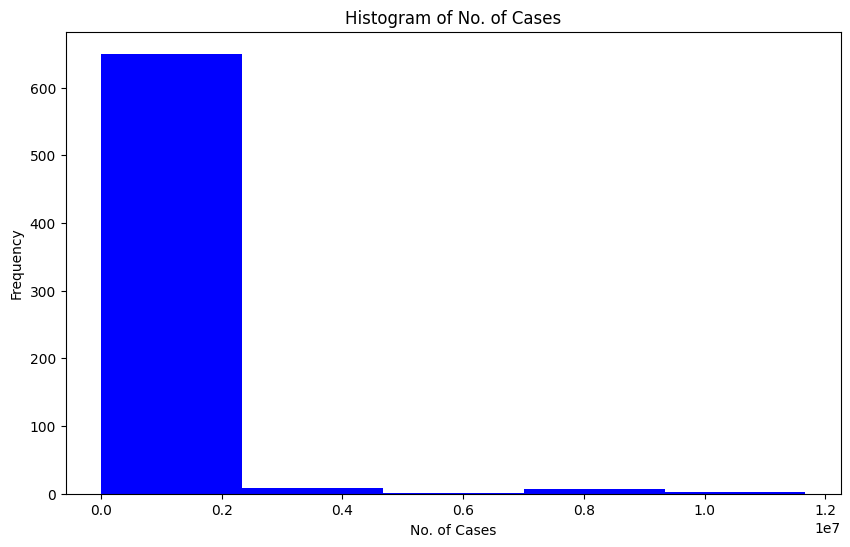

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(numVtempDf['No. of cases'], bins=5, color='blue')
plt.title('Histogram of No. of Cases')
plt.xlabel('No. of Cases')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of No. of Cases. We can see that most of the data falls within a specific range focused around 0.1e^7, with only a few having more.

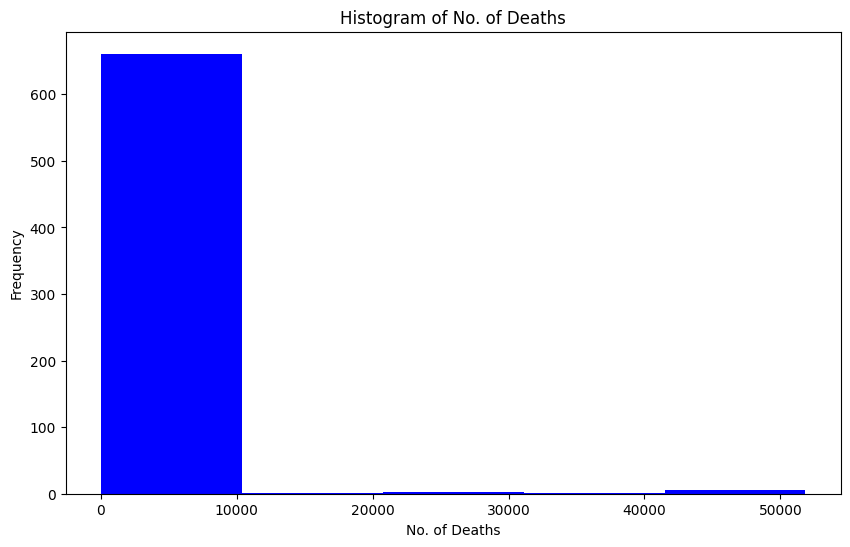

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(numVtempDf['No. of deaths'], bins=5, color='blue')
plt.title('Histogram of No. of Deaths')
plt.xlabel('No. of Deaths')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of No. of Deaths. Here, most of the data points are also focused around a specific range of about 10,000, with a few having more.

In [10]:
print("Average Temperature Statistics:\n", numVtempDf['YearlyAvgTemp'].describe())

Average Temperature Statistics:
 count    670.000000
mean      72.433654
std        9.412470
min       43.236697
25%       64.208082
50%       75.165618
75%       81.056926
max       85.466667
Name: YearlyAvgTemp, dtype: float64


For YearlyAvgTemp, the mean is 72.433654, the median is 75.165618, and the max is 85.466667. With a reasonable std, the graph is fairly close to normal distribution centered around the mid-70s (in Fahrenheit). 

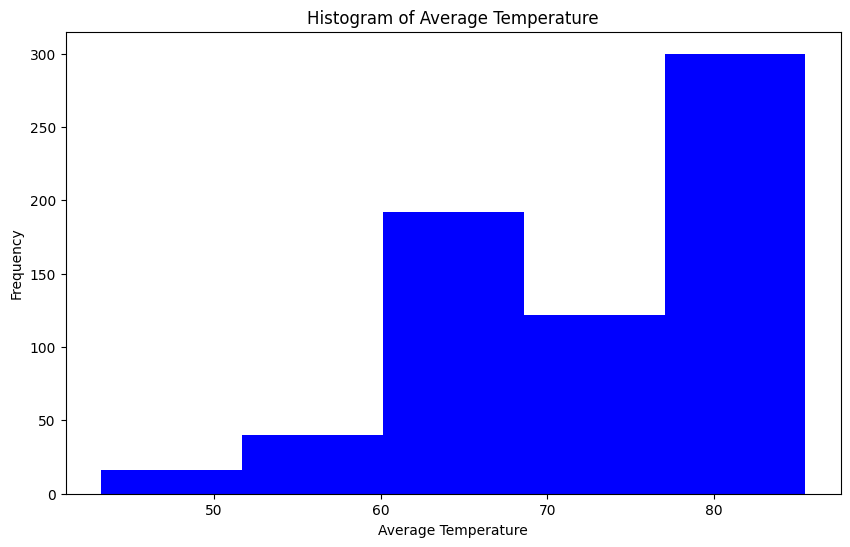

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(numVtempDf['YearlyAvgTemp'], bins=5, color='blue')
plt.title('Histogram of Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of Average Temperature. This is more of an even spread, however there is a clear skew towards the right.

#### Graphs

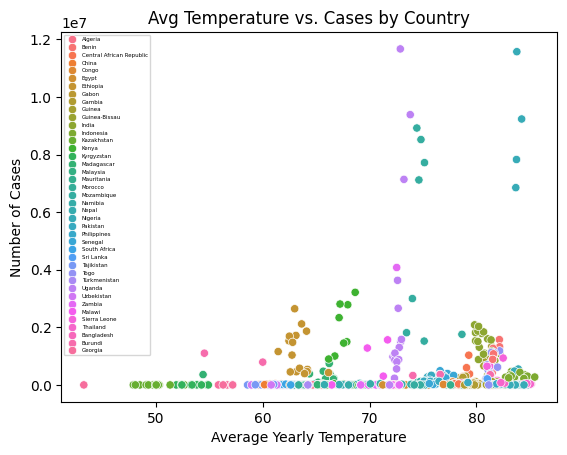

In [12]:
sns.scatterplot(data=numVtempDf, x="YearlyAvgTemp", y="No. of cases", hue="Country")
plt.xlabel("Average Yearly Temperature")
plt.ylabel("Number of Cases")
plt.title("Avg Temperature vs. Cases by Country")
plt.legend(fontsize=4)
plt.show()

This initial graph looks at temperature (in Fahrenheit) versus No. of cases. There are outlier such as the purple, teal, and blue that are strongly affecting the data. Removing those will get a better picture of the relationship. However, first running statistical tests will allow us to see if there is a relationship.

In [13]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ YearlyAvgTemp', numVtempDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.673
Date:                Sun, 23 Mar 2025   Prob (F-statistic):            0.00576
Time:                        21:50:08   Log-Likelihood:                -10334.
No. Observations:                 670   AIC:                         2.067e+04
Df Residuals:                     668   BIC:                         2.068e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.321e+05   3.63e+05     -1.740      0.0

Based on this, the relationship is statistically significant (0.006 < 0.05) however it is weakly significant based on the Prob (F-Statistic). In addition, the R-squared value YearlyAvgTemp is not a strong predictor. In addition, the Skew shows how there is a heavy right skew in the data. This coincides with visual inspection as there seems to be some sort of relationship but not a strong one.

However, the outliers could have potentially warped this relationship. Rerunning without those outliers may affect the relationship.

['Mozambique' 'Nigeria' 'Uganda' 'Zambia']


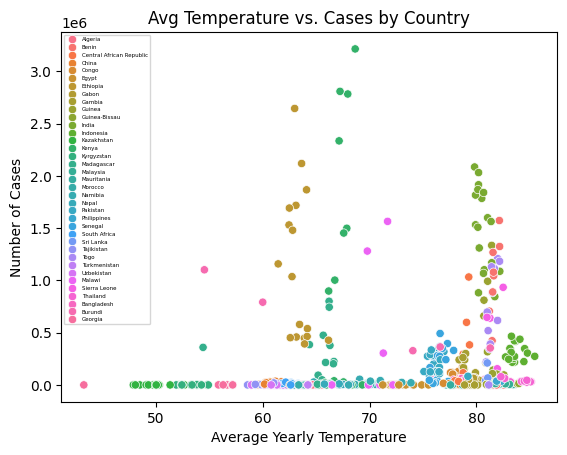

In [14]:
#Identifying and removing which countries are the outliers
high_cases = numVtempDf[numVtempDf["No. of cases"] > 4000000]
countries_over_threshold = high_cases["Country"].unique()
print(countries_over_threshold)
noOutliersNumVtempDf = numVtempDf[~numVtempDf["Country"].isin(["Mozambique", "Nigeria", "Uganda", "Zambia"])]

sns.scatterplot(data=noOutliersNumVtempDf, x="YearlyAvgTemp", y="No. of cases", hue="Country")
plt.xlabel("Average Yearly Temperature")
plt.ylabel("Number of Cases")
plt.title("Avg Temperature vs. Cases by Country")
plt.legend(fontsize=4)
plt.show()

Looking at the graph now, a general trend with higher temperatures and a greater number of cases can be seen.

In [15]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ YearlyAvgTemp', noOutliersNumVtempDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     8.479
Date:                Sun, 23 Mar 2025   Prob (F-statistic):            0.00373
Time:                        21:50:08   Log-Likelihood:                -8678.9
No. Observations:                 601   AIC:                         1.736e+04
Df Residuals:                     599   BIC:                         1.737e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+05   1.39e+05     -1.465      0.1

Rerunning the statistical tests, gives a similar view. That there is a significant relationship however it is still a weak predictor.

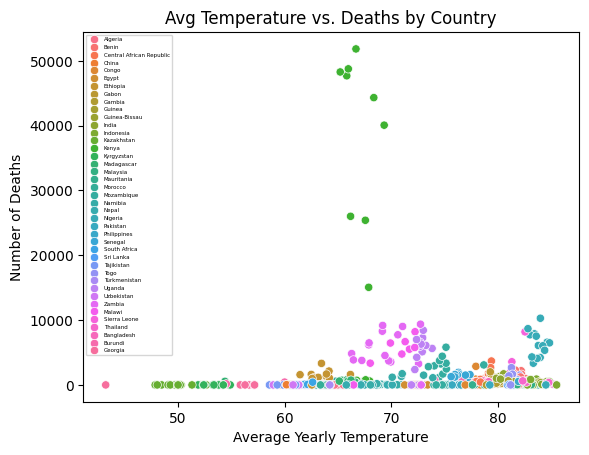

In [16]:
sns.scatterplot(data=numVtempDf, x="YearlyAvgTemp", y="No. of deaths", hue="Country")
plt.xlabel("Average Yearly Temperature")
plt.ylabel("Number of Deaths")
plt.title("Avg Temperature vs. Deaths by Country")
plt.legend(fontsize=4)
plt.show()

Now, Similarly, for No. of deaths there is an outlier, the green one. Removing it will allow for greater clarity in the graph. 

['Kenya']


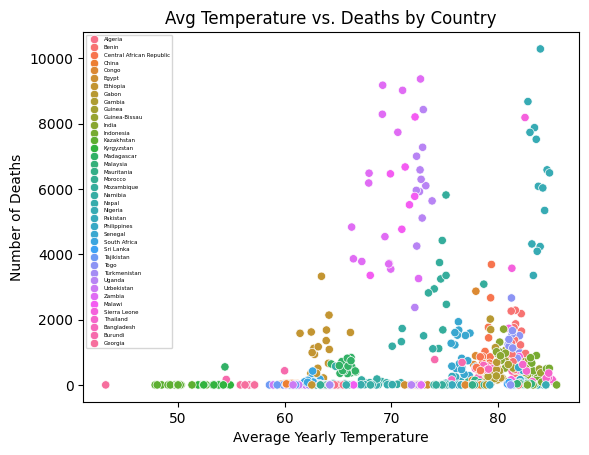

In [17]:
#Identifying and removing which countries are the outliers
high_deaths = numVtempDf[numVtempDf["No. of deaths"] > 15000]
countries_over_threshold = high_deaths["Country"].unique()
print(countries_over_threshold)
noOutliersNumVtempDf = numVtempDf[~numVtempDf["Country"].isin(["Kenya"])]

sns.scatterplot(data=noOutliersNumVtempDf, x="YearlyAvgTemp", y="No. of deaths", hue="Country")
plt.xlabel("Average Yearly Temperature")
plt.ylabel("Number of Deaths")
plt.title("Avg Temperature vs. Deaths by Country")
plt.legend(fontsize=4)
plt.show()

Upon review of the graph without the outlier, we can see that there is a correlation, where greater temperatures is generally associated with more deaths.

In [18]:
outcome,predictors = patsy.dmatrices('Q("No. of deaths") ~ YearlyAvgTemp', noOutliersNumVtempDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     17.92
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           2.63e-05
Time:                        21:50:09   Log-Likelihood:                -5794.9
No. Observations:                 655   AIC:                         1.159e+04
Df Residuals:                     653   BIC:                         1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1327.4230    508.412     -2.611      0.0

Relative to the Number of Cases graph, the relationship is stronger. The relationship is still significant with less skew than the case graph. However, the impact of temperature is still not very high on Number of Deaths.

### Socioeconomic Factors and Spread

In [19]:
print("Agriculture GVA Statistics:\n", numVsociDf['Economy: Agriculture (% of GVA)'].describe())
print("------------------------")
print("Health Expenditure Statistics:\n", numVsociDf['Health: Total expenditure (% of GDP)'].describe())
print("------------------------")
print("Education Expenditure Statistics:\n", numVsociDf['Education: Government expenditure (% of GDP)'].describe())
print("------------------------")
print("Health Care Index Statistics:\n", numVsociDf['Health Care Index'].describe())
print("------------------------")
print("Climate Index Statistics:\n", numVsociDf['Climate index'].describe())
print("------------------------")

Agriculture GVA Statistics:
 count    20.000000
mean      8.280000
std       5.767203
min       0.700000
25%       4.800000
50%       8.600000
75%       9.525000
max      25.500000
Name: Economy: Agriculture (% of GVA), dtype: float64
------------------------
Health Expenditure Statistics:
 count    20.000000
mean      5.350000
std       1.759934
min       2.600000
25%       4.175000
50%       5.050000
75%       6.525000
max       8.800000
Name: Health: Total expenditure (% of GDP), dtype: float64
------------------------
Education Expenditure Statistics:
 count    20.000000
mean      3.060000
std       2.287587
min       0.000000
25%       0.000000
50%       3.700000
75%       5.025000
max       6.000000
Name: Education: Government expenditure (% of GDP), dtype: float64
------------------------
Health Care Index Statistics:
 count    20.000000
mean     64.085500
std      11.825362
min      36.900000
25%      60.070000
50%      65.295000
75%      70.502500
max      83.200000
Name: Heal

- For Economy: Agriculture (% of GVA), the mean is 8.280000, the median is 8.600000, and the max is 25.500000. While the max is large, the overall data is still relatively normal.
- For Health: Total expenditure (% of GDP), the mean is 5.350000, the median is 5.050000, and the max is 8.800000. With the overall data being relatively normal. 
- For Education: Government expenditure (% of GDP), the mean is 3.060000, the median is 3.700000, and the max is 6.000000. With the overall data being relatively normal. 
- For Health Care Index, the mean is 64.085500, the median is 65.295000, and the max is 83.200000. With the overall data being relatively normal. For context, Health Care Index is a value from 0 - 100 where 100 represents high levels of Health Care available to the population. 
- For Climate Index, the mean is 37.526000, the median is 51.640000, and the max is 91.170000. The data is relatively skewed by a few data points as there are a few countries with high negative values. For context, Climate Index is a value from -100 - 100 where 100 represents a low level of impact to the climate by the country.

#### Histograms

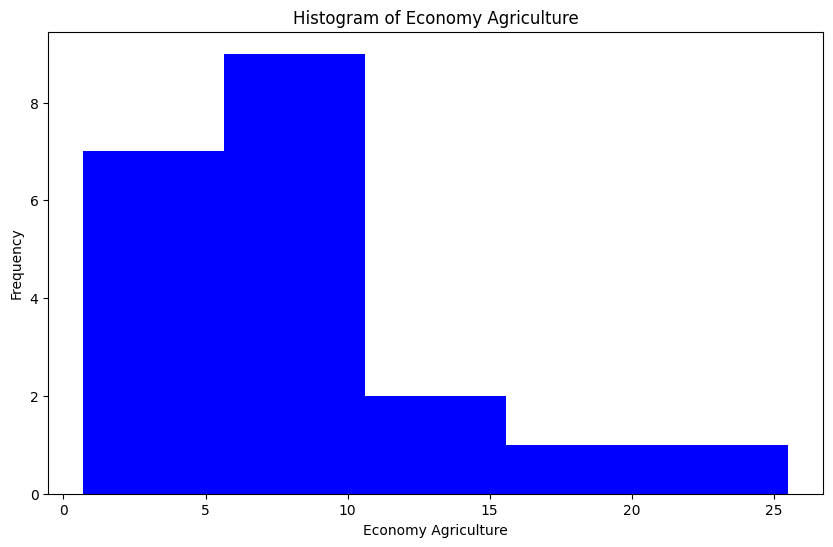

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(numVsociDf['Economy: Agriculture (% of GVA)'], bins=5, color='blue')
plt.title('Histogram of Economy Agriculture')
plt.xlabel('Economy Agriculture')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of economy agriculture. There is more of an even spread, however there is a clear skew towards the left.

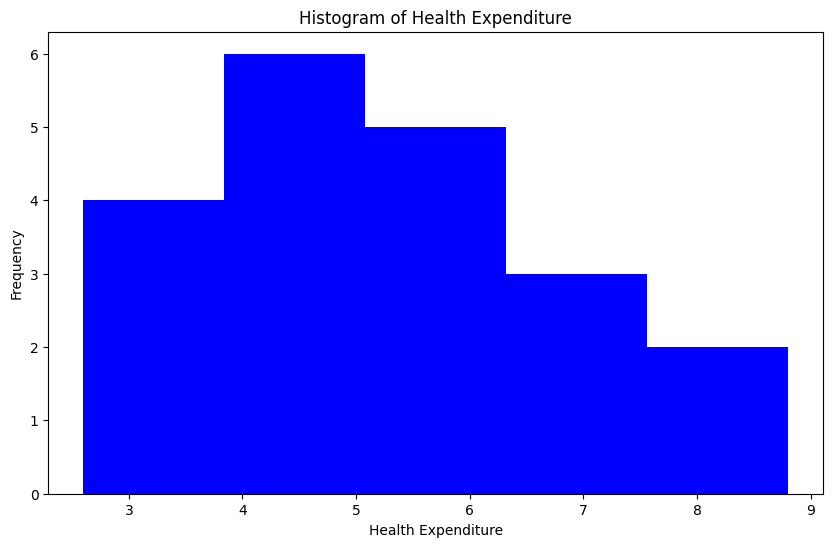

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(numVsociDf['Health: Total expenditure (% of GDP)'], bins=5, color='blue')
plt.title('Histogram of Health Expenditure')
plt.xlabel('Health Expenditure')
plt.ylabel('Frequency')
plt.show()

This histogram of the distributi0on of health expenditure also shows a more even spread with a little bit of a lean to the left. 

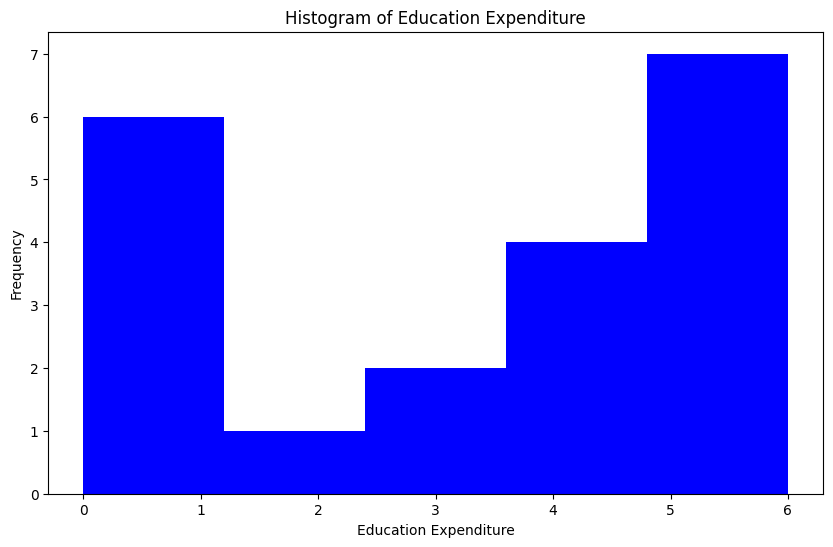

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(numVsociDf['Education: Government expenditure (% of GDP)'], bins=5, color='blue')
plt.title('Histogram of Education Expenditure')
plt.xlabel('Education Expenditure')
plt.ylabel('Frequency')
plt.show()


This histogram displays the distribution of education expenditure. There is no strong relationship with what has the greatest frequency.

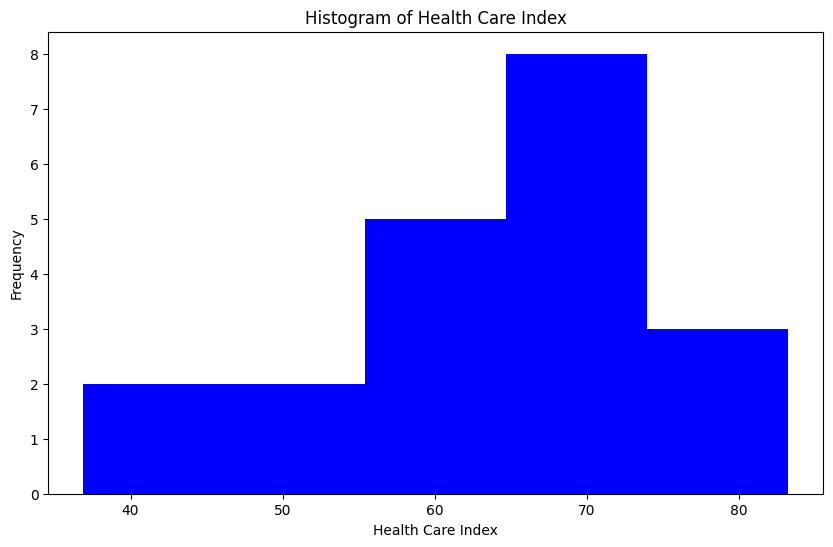

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(numVsociDf['Health Care Index'], bins=5, color='blue')
plt.title('Histogram of Health Care Index')
plt.xlabel('Health Care Index')
plt.ylabel('Frequency')
plt.show()

For the distribution of health care index, the histogram displays a greater trend towards the right.

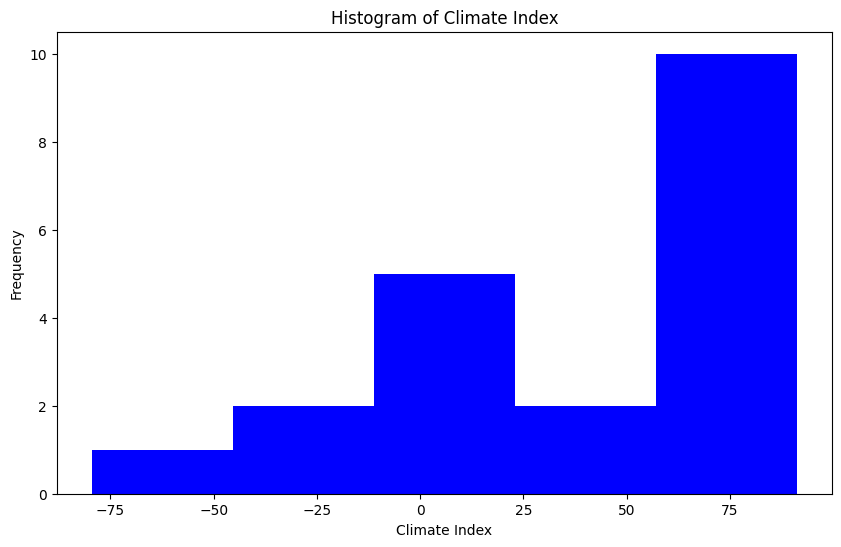

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(numVsociDf['Climate index'], bins=5, color='blue')
plt.title('Histogram of Climate Index')
plt.xlabel('Climate Index')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of climate index. Generally, there is a skew towards the right of the graph.

#### Graphs

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/1270257342.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


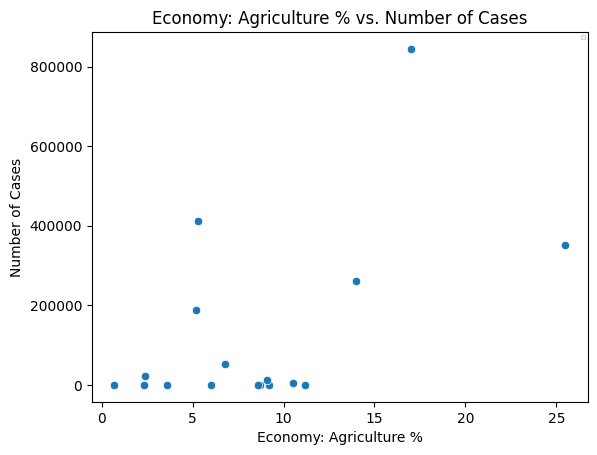

In [25]:
sns.scatterplot(data=numVsociDf, x="Economy: Agriculture (% of GVA)", y="No. of cases")
plt.xlabel("Economy: Agriculture %")
plt.ylabel("Number of Cases")
plt.title("Economy: Agriculture % vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

While there does seem to be some relationship, the presences of outliers skews the results. 

['India' 'Venezuela (Bolivarian Republic of)']


/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/2057341737.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


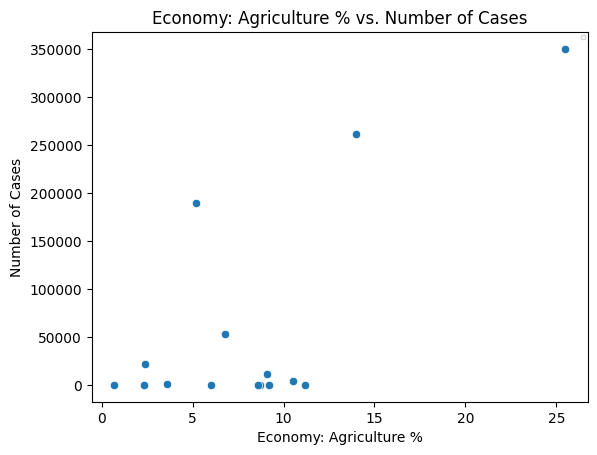

In [26]:
high_cases = numVsociDf[numVsociDf["No. of cases"] > 400000]
countries_over_threshold = high_cases["Country"].unique()
print(countries_over_threshold)
noOutliersNumVsociDf = numVsociDf[~numVsociDf["Country"].isin(["India", "Venezuela (Bolivarian Republic of)"])]

sns.scatterplot(data=noOutliersNumVsociDf, x="Economy: Agriculture (% of GVA)", y="No. of cases")
plt.xlabel("Economy: Agriculture %")
plt.ylabel("Number of Cases")
plt.title("Economy: Agriculture % vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

Based on the graph, there is a positive trend. This is important because a greater % of GVA in agriculture can be correlated to more hands-on/outdoors work within the country. This was a part of our hypothesis that this has a positive correlation with cases of malaria. 

In [27]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ Q("Economy: Agriculture (% of GVA)")', noOutliersNumVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     15.22
Date:                Sun, 23 Mar 2025   Prob (F-statistic):            0.00127
Time:                        21:50:09   Log-Likelihood:                -227.07
No. Observations:                  18   AIC:                             458.1
Df Residuals:                      16   BIC:                             459.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.311e+04    3.2e+04     -1.659      0.1

/Users/vinodv./Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


Statistical tests show that there is a statistical significance however the fit is modest, based on the R-squared value. Once again the relationship is not strong.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/1215641976.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


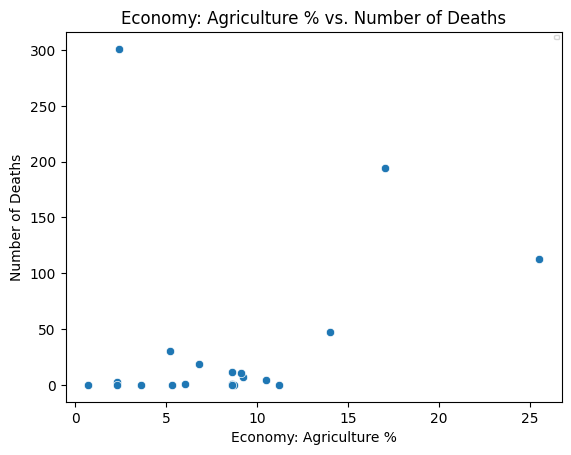

In [28]:
sns.scatterplot(data=numVsociDf, x="Economy: Agriculture (% of GVA)", y="No. of deaths")
plt.xlabel("Economy: Agriculture %")
plt.ylabel("Number of Deaths")
plt.title("Economy: Agriculture % vs. Number of Deaths")
plt.legend(fontsize=4)
plt.show()

This graph of agriculture GVA and No. of deaths is less clear as there is a spike at 3%.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/2098264802.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


['South Africa']


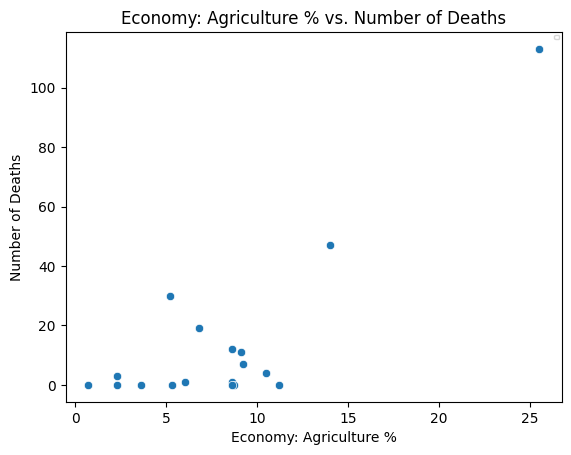

In [29]:
high_deaths = numVsociDf[numVsociDf["No. of deaths"] > 200]
countries_over_threshold = high_deaths["Country"].unique()
print(countries_over_threshold)
noOutliersNumVsociDf = numVsociDf[~numVsociDf["Country"].isin(["India", "South Africa"])]

sns.scatterplot(data=noOutliersNumVsociDf, x="Economy: Agriculture (% of GVA)", y="No. of deaths")
plt.xlabel("Economy: Agriculture %")
plt.ylabel("Number of Deaths")
plt.title("Economy: Agriculture % vs. Number of Deaths")
plt.legend(fontsize=4)
plt.show()

Removing the outliers has helped visualize the data more clearly. 

In [30]:
outcome,predictors = patsy.dmatrices('Q("No. of deaths") ~ Q("Economy: Agriculture (% of GVA)")', noOutliersNumVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     32.33
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           3.38e-05
Time:                        21:50:09   Log-Likelihood:                -74.946
No. Observations:                  18   AIC:                             153.9
Df Residuals:                      16   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.6159      7.045     -2.784      0.0

/Users/vinodv./Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


Based on the statistical tests, there is not a statistical relationship.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/1649419438.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


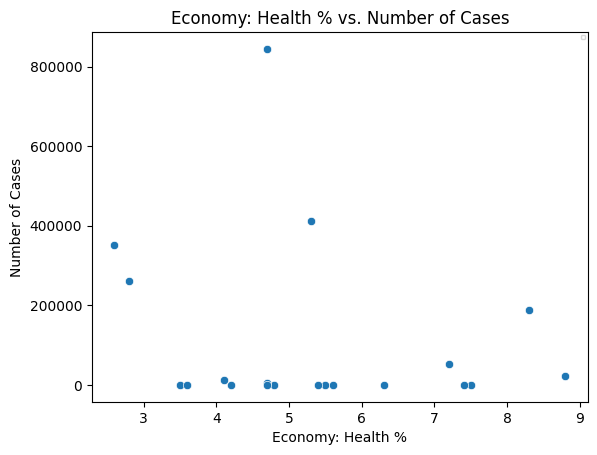

In [31]:
sns.scatterplot(data=numVsociDf, x="Health: Total expenditure (% of GDP)", y="No. of cases")
plt.xlabel("Economy: Health %")
plt.ylabel("Number of Cases")
plt.title("Economy: Health % vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

This graph does not show much of a relationship between the data.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/2842665569.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


['India']


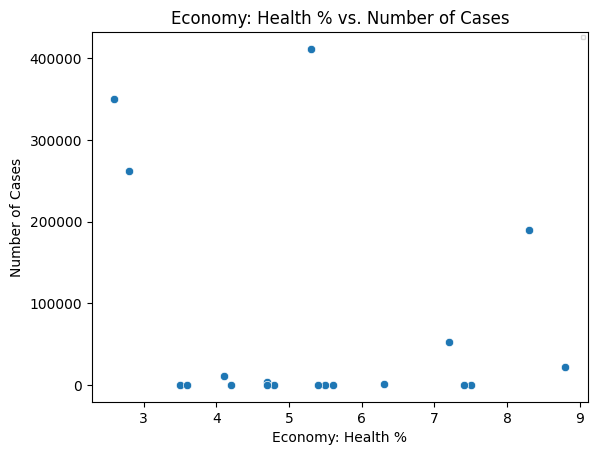

In [32]:
high_cases = numVsociDf[numVsociDf["No. of cases"] > 600000]
countries_over_threshold = high_cases["Country"].unique()
print(countries_over_threshold)
noOutliersNumVsociDf = numVsociDf[~numVsociDf["Country"].isin(["India"])]

sns.scatterplot(data=noOutliersNumVsociDf, x="Health: Total expenditure (% of GDP)", y="No. of cases")
plt.xlabel("Economy: Health %")
plt.ylabel("Number of Cases")
plt.title("Economy: Health % vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

With the removal of the outliers, there is not much of a relationship between the variables. 

In [33]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ Q("Health: Total expenditure (% of GDP)")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7961
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.384
Time:                        21:50:09   Log-Likelihood:                -273.05
No. Observations:                  20   AIC:                             550.1
Df Residuals:                      18   BIC:                             552.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.423e+05   1.59e+05      1.527      0.1

Based on these statistical tests, there is not a relationship between Health % and Number of Cases.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/1151086353.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


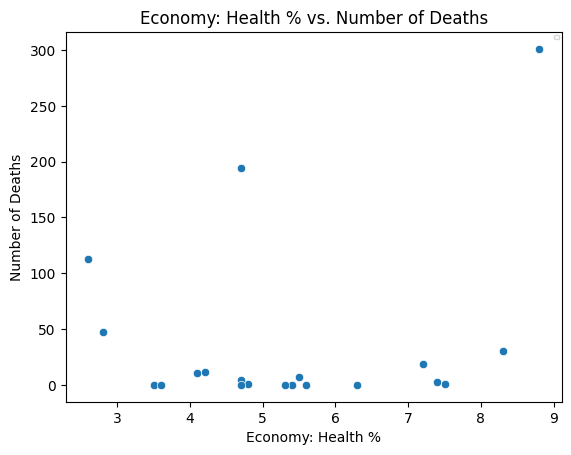

In [34]:
sns.scatterplot(data=numVsociDf, x="Health: Total expenditure (% of GDP)", y="No. of deaths")
plt.xlabel("Economy: Health %")
plt.ylabel("Number of Deaths")
plt.title("Economy: Health % vs. Number of Deaths")
plt.legend(fontsize=4)
plt.show()

While there may be a minor relationship, it likely is not strong.

In [35]:
outcome,predictors = patsy.dmatrices('Q("No. of deaths") ~ Q("Health: Total expenditure (% of GDP)")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9364
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.346
Time:                        21:50:09   Log-Likelihood:                -114.63
No. Observations:                  20   AIC:                             233.3
Df Residuals:                      18   BIC:                             235.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.9455     57.620     -0.277      0.7

Based on these tests, there is not a strong relationship between these metrics.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/200727321.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


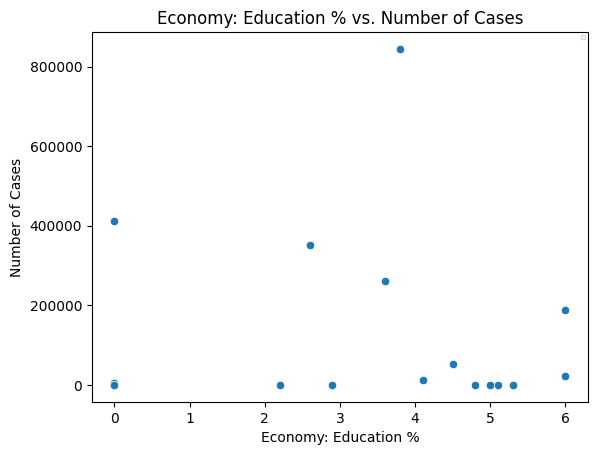

In [36]:
sns.scatterplot(data=numVsociDf, x="Education: Government expenditure (% of GDP)", y="No. of cases")
plt.xlabel("Economy: Education %")
plt.ylabel("Number of Cases")
plt.title("Economy: Education % vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

On early inspection, this graph seems to show a negative relationship between the variables. 

In [37]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ Q("Education: Government expenditure (% of GDP)")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                 0.0004263
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.984
Time:                        21:50:09   Log-Likelihood:                -273.48
No. Observations:                  20   AIC:                             551.0
Df Residuals:                      18   BIC:                             552.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.061e+05   8.41e+04      1.262      0.2

There is not much of a relationship between the variables. 

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/346255000.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


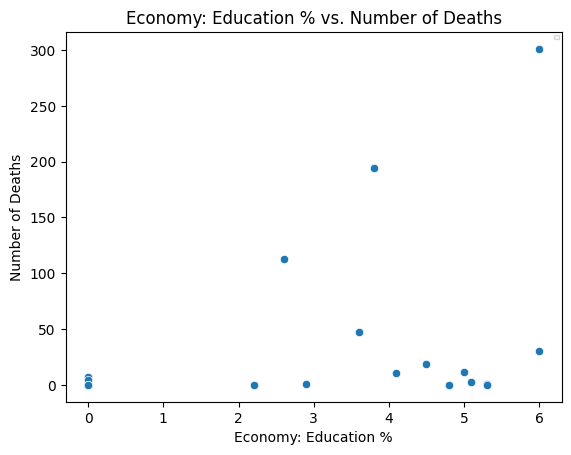

In [38]:
sns.scatterplot(data=numVsociDf, x="Education: Government expenditure (% of GDP)", y="No. of deaths")
plt.xlabel("Economy: Education %")
plt.ylabel("Number of Deaths")
plt.title("Economy: Education % vs. Number of Deaths")
plt.legend(fontsize=4)
plt.show()

This graph is similarly not fully clear however there does seem to be more of a positive correlation.

In [39]:
outcome,predictors = patsy.dmatrices('Q("No. of deaths") ~ Q("Education: Government expenditure (% of GDP)")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.200
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.155
Time:                        21:50:09   Log-Likelihood:                -113.99
No. Observations:                  20   AIC:                             232.0
Df Residuals:                      18   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4740     28.924      0.086      0.9

There is not much of a relationship.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/445654587.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


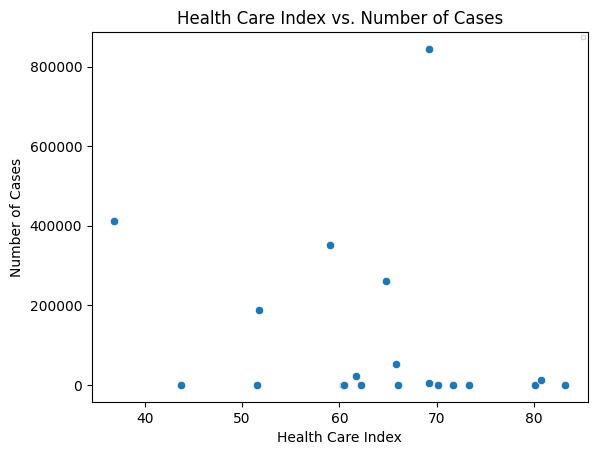

In [40]:
sns.scatterplot(data=numVsociDf, x="Health Care Index", y="No. of cases")
plt.xlabel("Health Care Index")
plt.ylabel("Number of Cases")
plt.title("Health Care Index vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

While there is a spike at around 70, generally there is a negative trend.

In [41]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ Q("Health Care Index")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8977
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.356
Time:                        21:50:09   Log-Likelihood:                -272.99
No. Observations:                  20   AIC:                             550.0
Df Residuals:                      18   BIC:                             552.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.62e+05   2.73e+05      1.326      0.2

There is not much of a statistical relationship.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/672818081.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


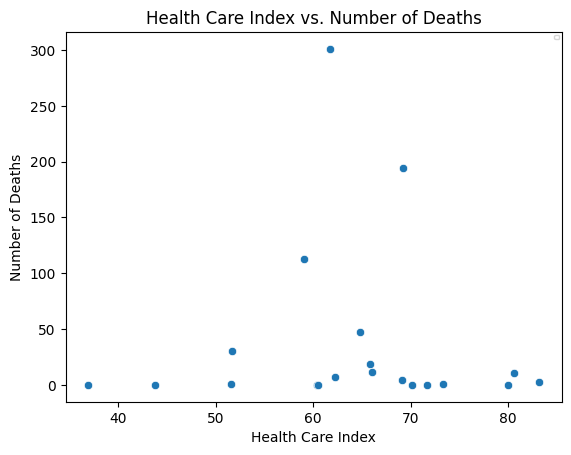

In [42]:
sns.scatterplot(data=numVsociDf, x="Health Care Index", y="No. of deaths")
plt.xlabel("Health Care Index")
plt.ylabel("Number of Deaths")
plt.title("Health Care Index vs. Number of Deaths")
plt.legend(fontsize=4)
plt.show()

This graph is distributed from the middle and spikes at both 60 and 70. Here there is no clear correlation between the values. 

In [43]:
outcome,predictors = patsy.dmatrices('Q("No. of deaths") ~ Q("Health Care Index")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.006359
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.937
Time:                        21:50:09   Log-Likelihood:                -115.14
No. Observations:                  20   AIC:                             234.3
Df Residuals:                      18   BIC:                             236.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1493    101.920      0.443      0.6

There is no relationship between the variables.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/3642606997.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


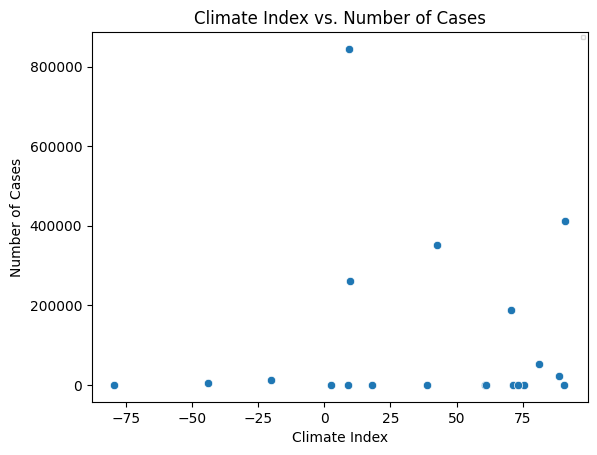

In [44]:
sns.scatterplot(data=numVsociDf, x="Climate index", y="No. of cases")
plt.xlabel("Climate Index")
plt.ylabel("Number of Cases")
plt.title("Climate Index vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

There does not seem to be much of a relationship between the variables.

['India']


/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/4288773693.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


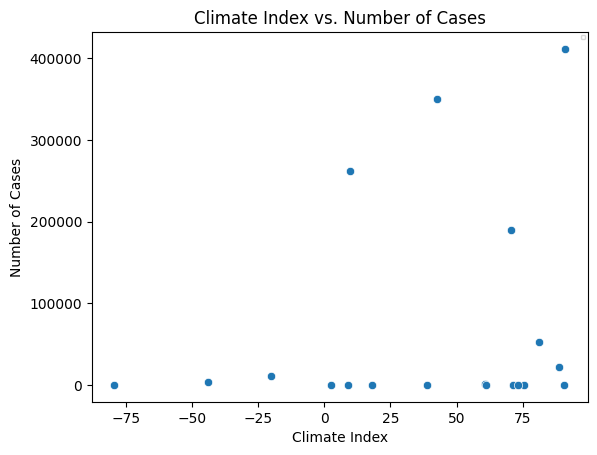

In [45]:
high_cases = numVsociDf[numVsociDf["No. of cases"] > 800000]
countries_over_threshold = high_cases["Country"].unique()
print(countries_over_threshold)
noOutliersNumVsociDf = numVsociDf[~numVsociDf["Country"].isin(["India"])]

sns.scatterplot(data=noOutliersNumVsociDf, x="Climate index", y="No. of cases")
plt.xlabel("Climate Index")
plt.ylabel("Number of Cases")
plt.title("Climate Index vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

This graph shows a positive correlation between climate index and No. of cases. This could potentially be confounded as some of the countries with negative values for their index don't have reported values. 

In [46]:
outcome,predictors = patsy.dmatrices('Q("No. of cases") ~ Q("Climate index")', noOutliersNumVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7220
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.407
Time:                        21:50:10   Log-Likelihood:                -249.97
No. Observations:                  19   AIC:                             503.9
Df Residuals:                      17   BIC:                             505.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.757e+04   3.92e+04      1.213      0.2

/Users/vinodv./Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


There is not much of a statistical relationship.

/var/folders/l7/y8rq4lhd10v2x7pqt5n5t6r00000gn/T/ipykernel_60242/1411517718.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=4)


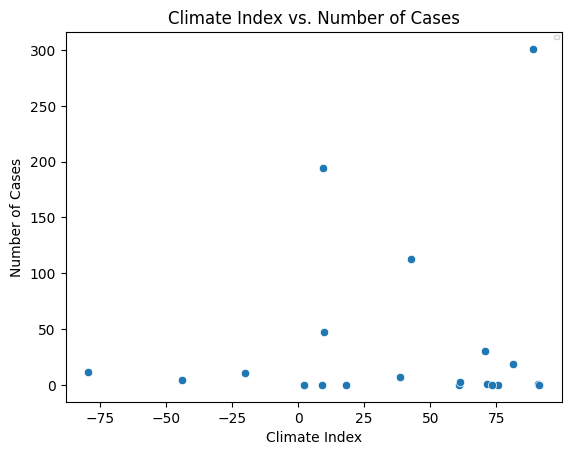

In [47]:
sns.scatterplot(data=numVsociDf, x="Climate index", y="No. of deaths")
plt.xlabel("Climate Index")
plt.ylabel("Number of Cases")
plt.title("Climate Index vs. Number of Cases")
plt.legend(fontsize=4)
plt.show()

This visualization of Climate index and No. of deaths is very similar to the previous with with No. of cases, as deaths counts spike more greatly at a higher climate indexes.

In [48]:
outcome,predictors = patsy.dmatrices('Q("No. of deaths") ~ Q("Climate index")', numVsociDf)
predictors = sm.add_constant(predictors)
res_1 = sm.OLS(outcome,predictors)
res_1 = res_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.2758
Date:                Sun, 23 Mar 2025   Prob (F-statistic):              0.606
Time:                        21:50:10   Log-Likelihood:                -114.99
No. Observations:                  20   AIC:                             234.0
Df Residuals:                      18   BIC:                             236.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6296     22.930      1.292      0.2

There is not much of a relationship between these two variables.

# Ethics & Privacy

Potential biases could be present in our datasets, as location of data can be biased to contain more cases on certain regions and less from others. The underreporting of data from these locations can create false conclusions that may wrongly represent less reported areas. To minimize bias, we hope to gather and compare data from multiple sources, as well as hope to avoid making overly generalized predictions. To avoid confirmation bias as well as bias in our representation, we will try to develop a model that aligns with our collected data that portrays data fairly across the different groups.

In terms of data privacy, we will be using public datasets from health organizations/public sources, allowing us to gather data with less issues regarding privacy and terms of use. If there is any personal/private information, we will make sure to strip the data of this information.

# Discussion and Conclusion

From our visualizations and statistical tests, we identified statistically significant relationships between Average Temperature and Malaria Spread, as well as between % Agriculture Expenditure and Malaria Spread. However, for the rest of the socioeconomic factors analyzed, no clear statistical relationship was observed.

Our findings support our first hypothesis that Temperature has a significant relationship with Malaria Spread. This aligns with previous studies that have established temperature as a key environmental factor affecting mosquito populations and malaria transmission. Additionally, the observed relationship between % Agriculture Expenditure and Malaria Spread partially supports our second hypothesis, as we expected that regions with greater involvement in physically demanding, agriculture-focused work would experience higher malaria transmission rates due to increased outdoor exposure to mosquitoes.

These findings contribute to the broader body of research on malaria transmission by reinforcing the importance of climate factors, particularly temperature, in disease spread. Our work builds upon previous studies by integrating socioeconomic factors, although we found limited statistical evidence for their direct influence. 

The absence of significant relationships between most socioeconomic factors and malaria transmission could be attributed to several potential reasons. One possibility is that other unexamined or confounding variables, such as healthcare access, population density, or Malaria education, may mediate the influence of socioeconomic conditions on malaria transmission. Another explanation is that data limitations, such as the Socioecnomic factors dataset being limited to just 2017.  Future research could explore these aspects in more depth to clarify these potential interactions.

In conclusion, our research highlights the crucial role of climate variables in malaria transmission, particularly temperature, and provides some evidence for the influence of agricultural activity on disease spread. While our findings did not confirm strong links between other socioeconomic factors and malaria, they open avenues for further investigation into additional factors. 



# Team Contributions

- Thomas Nghiem - Statisitical analysis and data sourcing.
- Treeden Bautista - Model and visualization development
- Vinod Vairavaraj - Primarily focused on data cleaning and early visualizations. In addition, research and background portions.
- Royan Bhupatiraju - Video scripting and outline.
